In [1]:
import pandas as pd
train = pd.read_csv("train.csv")
holdout = pd.read_csv("test.csv")
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

def  data_func(df):
    df = process_missing(df)
    df = process_age(df)
    df = process_fare(df)
    df = process_titles(df)
    df = process_cabin(df)
    cols = ["Age_categories","Fare_categories","Title","Cabin_type","Sex"]
    for item in cols:
        df = create_dummies(df,item)
    return df
train = data_func(train)
holdout = data_func(holdout)


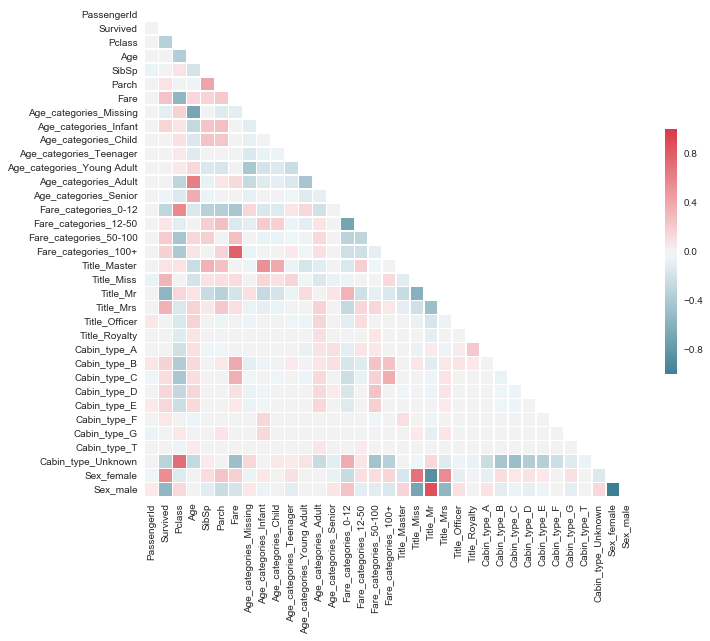

In [4]:
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot  as plt
def plot_correlation_heatmap(df):
    corr = df.corr()
    
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
    
plot_correlation_heatmap(train)

In [5]:
explore_cols = ["SibSp","Parch","Survived"]
explore = train[explore_cols].copy()
explore

explore["familysize"] = explore[["SibSp","Parch"]].sum(axis =1)
explore

pivot = explore.pivot_table(index = "familysize",values = "Survived")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_Unknown,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,0,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,0,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,0,0,0,0,1,0,1
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,...,0,0,0,0,0,0,0,1,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,...,0,0,0,1,0,0,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,...,0,0,0,0,0,0,0,1,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,...,0,0,0,0,0,0,0,1,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,...,0,0,0,0,0,0,0,1,1,0


In [6]:
def isalone(series):
    familysize = series[["SibSp","Parch"]].sum()
    if familysize > 0:
            return 0
    else:
        return 1
    print(familysize)

train["isalone"] = train.apply(isalone, axis = 1)
holdout["isalone"] = holdout.apply(isalone, axis = 1)

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
def select_features(df):
    df = df.dropna(axis = 1, how = "any")
    types = df.dtypes
    
    num_types = ["int64","float64","uint8"]
    cols = []
    for item in num_types:
        item_columns = types[types.values ==item].index.tolist()
        cols.extend(item_columns)
    
    df = df[cols]
    all_x = df.drop(["PassengerId","Survived"],axis = 1)
    all_y = df["Survived"]
    RF = RandomForestClassifier(random_state = 1)
    selector = RFECV(RF, cv = 10)
    selector.fit(all_x,all_y)
    #print(selector.support_)
    optimized_columns = all_x.columns[selector.support_]
    return optimized_columns

optimized_columns = select_features(train)
optimized_columns

Index(['Pclass', 'SibSp', 'Parch', 'isalone', 'Age', 'Fare',
       'Age_categories_Missing', 'Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
       'Fare_categories_0-12', 'Fare_categories_12-50',
       'Fare_categories_50-100', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E',
       'Cabin_type_Unknown', 'Sex_female', 'Sex_male'],
      dtype='object')

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(df, cols):
    all_x = df[cols]
    all_y = df["Survived"]
    
    models = [
        {
            "name":"LogisticRegression",
            "estimator":LogisticRegression(),
            "hyperparameters":
            {
                 "solver":["newton-cg","lbfgs","liblinear"]
            }
        },
        {
            "name":"KNeighborsClassifier",
            "estimator":KNeighborsClassifier(),
            "hyperparameters":
            {
                "n_neighbors":range(1,20,2),
                "weights":["distance","uniform"],
                "algorithm":["ball_tree","kd_tree","brute"],
                "p":[1,2]
            }
        },
        {
            "name":"RandomForestClassifier",
            "estimator":RandomForestClassifier(),
            "hyperparameters":
            {
                "n_estimators":[4,6,9],
                "criterion":["entropy","gini"],
                "max_depth":[2,5,10],
                "max_features":["log2","sqrt"],
                "min_samples_leaf":[1,5,8],
                "min_samples_split":[2,3,5]
            }
        }
    ]
    best_estimator = {}
    for model in models:
        print(model["name"])
        grid = GridSearchCV(model["estimator"],param_grid = model["hyperparameters"],cv = 10)
        grid.fit(all_x,all_y)
        best_params = grid.best_params_ #精度最高时的超参数
        best_score = grid.best_score_ #精度最高的值
        print("best_params:"+ str(best_params) )
        print("best_score:"+ str(best_score) )
        best_estimator[model["name"]] = grid.best_estimator_
        
    return best_estimator
        
best_estimator = select_model(train,optimized_columns)

LogisticRegression
best_params:{'solver': 'newton-cg'}
best_score:0.819304152637
KNeighborsClassifier
best_params:{'algorithm': 'kd_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
best_score:0.776655443322
RandomForestClassifier
best_params:{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 6}
best_score:0.841750841751


In [10]:
optimized_columns #features
def save_submission_file(models, df, cols):
    df1 = df[cols]
    holdout_predictions = models.predict(df1)
    
    holdout_ids = df["PassengerId"]
    submission_df = {
        "PassengerId":holdout_ids,
        "Survived":holdout_predictions
    }
    submission = pd.DataFrame(submission_df)
    submission.to_csv("submission_4.csv",index = False)
    return submission
    
result = save_submission_file(best_estimator["RandomForestClassifier"],holdout,optimized_columns)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0
